✅ TensorFlow version: 2.20.0
📥 Downloading IMDB dataset...
✅ Dataset downloaded and saved as ./imdb_data.npz
Training data shape: (25000, 200)
Test data shape: (25000, 200)


C:\Users\Siddhant Gite\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 155s 944ms/step - accuracy: 0.7842 - loss: 0.4408 - val_accuracy: 0.8344 - val_loss: 0.3847
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.9032 - loss: 0.2444 - val_accuracy: 0.8680 - val_loss: 0.3221
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 158s 1s/step - accuracy: 0.9353 - loss: 0.1760 - val_accuracy: 0.8642 - val_loss: 0.4097
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 144s 916ms/step - accuracy: 0.9525 - loss: 0.1348 - val_accuracy: 0.8604 - val_loss: 0.3763
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 137s 875ms/step - accuracy: 0.9694 - loss: 0.0864 - val_accuracy: 0.8566 - val_loss: 0.4245


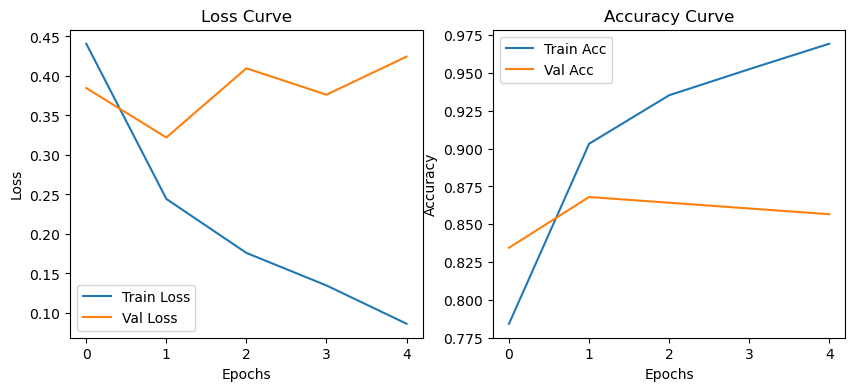

782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.8542 - loss: 0.4268

✅ Test Accuracy: 0.8542
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step

🎯 Sample Predictions:

Review #0
Actual: 0 | Predicted: 0
-----------------------------
Review #1
Actual: 1 | Predicted: 1
-----------------------------
Review #2
Actual: 1 | Predicted: 1
-----------------------------
Review #3
Actual: 0 | Predicted: 1
-----------------------------
Review #4
Actual: 1 | Predicted: 1
-----------------------------

📁 Dataset location: C:\Users\Siddhant Gite\Untitled Folder\imdb_data.npz


C:\Users\Siddhant Gite\AppData\Local\Temp\ipykernel_17556\418357182.py:103: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Actual:", y_test[i], "| Predicted:", int(pred[i]))


In [1]:
# ------------------------------------------------------------
# IMDB Sentiment Classification using LSTM (Local Save + Load)
# ------------------------------------------------------------

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

print("✅ TensorFlow version:", tf.__version__)

# ------------------------------------------------------------
# Step 1: Download & Save IMDB Dataset Locally
# ------------------------------------------------------------
num_words = 10000
maxlen = 200
save_path = "./imdb_data.npz"

if not os.path.exists(save_path):
    print("📥 Downloading IMDB dataset...")
    (X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=num_words)
    np.savez_compressed(save_path, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
    print(f"✅ Dataset downloaded and saved as {save_path}")
else:
    print(f"📂 Found local dataset at {save_path}. Loading...")

# ------------------------------------------------------------
# Step 2: Load IMDB Dataset from Local File
# ------------------------------------------------------------
data = np.load(save_path, allow_pickle=True)
X_train, y_train = data["X_train"], data["y_train"]
X_test, y_test = data["X_test"], data["y_test"]

# ------------------------------------------------------------
# Step 3: Preprocess (Pad Sequences)
# ------------------------------------------------------------
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# ------------------------------------------------------------
# Step 4: Build LSTM Model
# ------------------------------------------------------------
model = keras.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen),
    layers.LSTM(128),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ------------------------------------------------------------
# Step 5: Train the Model
# ------------------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    verbose=1
)

# ------------------------------------------------------------
# Step 6: Plot Accuracy and Loss
# ------------------------------------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend()

plt.show()

# ------------------------------------------------------------
# Step 7: Evaluate Model
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# ------------------------------------------------------------
# Step 8: Predict on Sample Reviews
# ------------------------------------------------------------
pred = (model.predict(X_test[:5]) > 0.5).astype(int)

print("\n🎯 Sample Predictions:\n")
for i in range(5):
    print(f"Review #{i}")
    print("Actual:", y_test[i], "| Predicted:", int(pred[i]))
    print("-----------------------------")

print(f"\n📁 Dataset location: {os.path.abspath(save_path)}")
